In [25]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [26]:
#NN vectors 
a1 = 0.5*(np.array([1, np.sqrt(3)]))
a2 = 0.5*(np.array([1, -np.sqrt(3)]))
a3 = 0.5*(np.array([-1,0]))

#NNN vectors
d1 = np.array([0, -np.sqrt(3)])
d2 = np.array([1.5, 0.5*np.sqrt(3)])
d3 = np.array([-1.5, 0.5*np.sqrt(3)])

#Recipicoal Lattice 
G = np.array([0,0])
K = np.array([np.sqrt(3), 1])*(2*pi/(3*np.sqrt(3)))
M = np.array([np.sqrt(3), 0])*(2*pi/(3*np.sqrt(3)))
K2 = np.array([np.sqrt(3), -1])*(2*pi/(3*np.sqrt(3)))

#K-path
#K点路径G-M
kgk = np.linspace(G,K,100,endpoint=False)
kkm = np.linspace(K,M,100,endpoint=False)
kmk2 = np.linspace(M,K2,100)
kk2g = np.linspace(K2,G,100)

##K点相对距离
def Dist(r1,r2):
    return np.linalg.norm(r1-r2) 
lgk=Dist(G,K)
lkm=Dist(K,M)
lmk2=Dist(M,K2)
lk2g=Dist(K2,G)

lk = np.linspace(0,1,100)
xgk = lgk * lk
xkm = lkm * lk + xgk[-1]
xmk2 = lmk2 * lk + xkm[-1]
xk2g = lk2g * lk + xmk2[-1]

kpath = np.concatenate((xgk,xkm,xmk2,xk2g),axis=0)
Node = [0,xgk[-1],xkm[-1],xmk2[-1],xk2g[-1]]

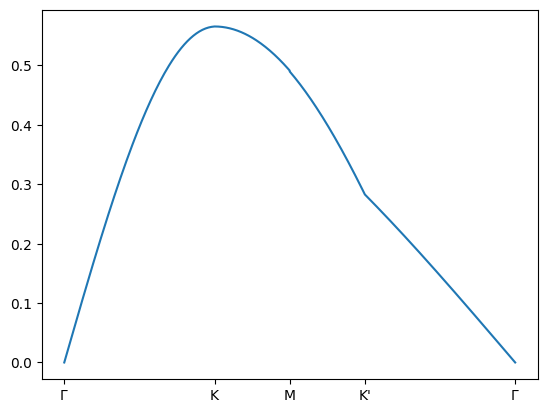

In [27]:
#spin exchange parameters
J1 = 0.2
J2 = 0
J3 = 0
A = 0.0
D2 = 0.1
S = 2.5

def E(K):
    Keff = A * (2*S-1)/S
    f = np.exp(1.j*K.dot(a1)) + np.exp(1.j*K.dot(a3)) + np.exp(1.j*K.dot(a3))
    f_2 = (f * np.conj(f)).real
    E = np.sqrt(round((3*J1-Keff)*(3*J1-Keff),6) - round(J1*J1*f_2,6))
    return E

Eig_gk = np.array(list(map(E,kgk)))
Eig_km = np.array(list(map(E,kkm)))
Eig_mk2 = np.array(list(map(E,kmk2)))
Eig_k2g = np.array(list(map(E,kk2g)))
eig_1 = np.hstack((Eig_gk,Eig_km,Eig_mk2,Eig_k2g))

plt.plot(kpath, eig_1)
plt.xticks(Node,[r'$\Gamma$','K','M',"K\'",r'$\Gamma$'])
plt.show()